# Mid-Project | Ironhack 

## Case Study: Housing - Regression

#### Get data 

In [1]:
import numpy as np
import pandas as pd
import datetime
# option so we can always see all columns
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("regression_data.xls")
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Data description


| Column name | Description |
| --- | --- | 
| id | unique identification number for the property |
| date | the date the house was sold |
| bedrooms | the number of bedrooms |
| bathrooms | the number of bathrooms |
| sqft_living | living room area before renovations |
| sqft_lot | lotSize area before renovations |
| floors | the number of floors |
| waterfront | the house which has a view to a waterfront |
| view | the number or quality of the views of the house (from 0 (none) to 4 (4 sides or really good view)|
| condition | how good the condition is: 1 indicates worn-out property and 5 excellent |
| grade |  overall grade given to the housing unit, based on the King County grading system: 1 poor, 13 excellent |
| sqft_above | square footage of house apart from the basement |
| sqft_basement | area of the basement |
| yr_built | the year when the house was built |
| yr_renovated | the year when the house was renovated |
| zipcode | the zipcode of the location |
| lat | the latitude of the location |
| long | the longitude of the location |
| sqft_living15 | living room area in 2015, after renovations, this might or might not have affected the lotSize area |
| sqft_lot15 | lotSize area in 2015, after renovations |
| price | the price of the house |

#### EDA: Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.shape

(21597, 21)

##### Descriptive Statistics

In [6]:
df.describe(include=[np.number])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [7]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Check for nulls 

In [8]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Check for duplicates

In [9]:
df.duplicated().sum()

0

In [10]:
# Searching for duplicate "ids"
df["id"].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [11]:
# Searching for the number of duplicate ids
(df["id"].value_counts() >1).sum()

176

In [12]:
# We want to take a look at some duplicate ids
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [13]:
df[df['id'] == 1568100300]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
9105,1568100300,2014-09-17,6,4.5,3500,8504,2.0,0,0,3,7,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,350000
9106,1568100300,2015-01-21,6,4.5,3500,8504,2.0,0,0,3,7,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,682500


#### We have seen that the duplicate ids belong to the same property but with different sale dates. This is not relevant for our case study, so we proceed to drop duplicate rows, leaving only the row with the last sale.

In [14]:
df = df.drop_duplicates(subset = ['id'], keep = 'last')

In [15]:
# Confirming if the drop was correct
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [16]:
df["id"].value_counts()

1777500160    1
1322059002    1
8091411100    1
6071600370    1
1231001130    1
             ..
2174503500    1
1541700170    1
1898900040    1
9542801990    1
2424410110    1
Name: id, Length: 21420, dtype: int64

#### Analyse the categorical columns

Let's make a function to see together some characteristics of all the categorical columns: `bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition`, `grade`. 

In [17]:
df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']] = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']].astype(object)

In [18]:
#let's check that it's done
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [19]:
categorical=[column for column in df.columns if (df[column].dtype==object)]     

In [77]:
#let's make a function to see some characteristics of each categorical column: column name, unique values, number of unique values (percentage)
for i in categorical:
    print ('Column: {}'.format(df[i].name)) 
    print('Unique values: {}'.format(len(df[i].unique()))) 
    print(df[i].unique())
    print(df[i].value_counts())
    print(f"{round(df[i].value_counts()/sum(df[i].value_counts())*100,2)} %")
    print('\n----------')    

Column: bedrooms
Unique values: 11
[3 2 4 5 1 6 7 8 9 11 10]
3     9732
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
3     45.43
4     31.97
2     12.77
5      7.40
6      1.24
1      0.89
7      0.18
8      0.06
9      0.03
10     0.01
11     0.00
Name: bedrooms, dtype: float64 %

----------
Column: bathrooms
Unique values: 29
[1.0 2.25 3.0 2.0 4.5 1.5 2.5 1.75 2.75 3.25 4.0 3.5 0.75 4.75 5.0 4.25
 3.75 1.25 5.25 6.0 0.5 5.5 6.75 5.75 8.0 7.5 7.75 6.25 6.5]
2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.50       2
6.25       2
6.75       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
2.50    24.99
1.00    17.71
1.75    

In [21]:
#Let's analyse the columns 'bedrooms'. We see a single property with 33 bedrooms, could be an error, let's check the area of the house.
df[df['bedrooms'] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [22]:
#33 bedrooms could be a dormitory or hotel, but in 1 single floor and around 100 sqm has to be an error: let's asume is a typo error and it's 3 bedrooms 
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

In [38]:
#let's check that the replacement was done correctly: it is
df['bedrooms'].value_counts()

3     9732
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [23]:
# For the property with 11 bedrooms, all the data makes sense. 
df[df['bedrooms'] == 11]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,1773100755,2014-08-21,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,520000


Here we will clarify the meaning of the unique values of the column `bathrooms`, as it can be confusing. Doing some research we find out the meaning of 'quarters' bathrooms.

| Number | Name | Description |
| --- | --- | --- |
| 0.25 | Quarter | Only a toilet, or only a shower (quite uncommon) |
| 0.50 | Half | A toilet and a sink |
| 0.75 | Three-Quarter | A toilet, a sink and a shower/tub (not bidet) |


In [24]:
#Let's check the higher unique values of bathrooms too. Properties with 8 bathrooms seems to have enough sqft and floors, so no errors here. All the unique values of the rest of categorical variables make sense as well. 
df[df['bathrooms'] == 8.0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,1225069038,2014-05-05,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


In the same line, the column `condition` required a small research as well. The values represent the following:
- 1-3: minimum building standards, cabin or inferior structure.
- 4: older, low quality construction.
- 5: low construction costs, small and simple design.
- 6: lowest grade currently meeting building code, low quality materials and simple designs.
- 7: average grade of construction and design.
- 8: just above average in construction and design, better materials.
- 9: better architectural design and quality.
- 10: high quality features, better design, generally larger square footage. 
- 11: custom design, higher quality and more luxurious features.
- 12: custom design and excellent builders and materials.
- 13: custom designed and built, mansion level.

In [25]:
# We want to see the percentage of renovated houses
print(f" Percentage of renovated houses = {round((df['yr_renovated'] !=0).sum() / sum(df['yr_renovated'].value_counts())*100, 2)}%")

 Percentage of renovated houses = 4.25%


In [26]:
(df['yr_renovated'] !=0).sum()

910

In [ ]:
### show the percentage of renovated houses older than 30 years 
NOT FINISHED

#### Dropping irrelevant columns

In [27]:
# the id column doesn't provide relevant info for our prediction so we drop it, and the sqft_living and sqft_lot as well because they are old values, we have the new sqft_living15 and sqft_lot15 
df=df.drop(columns=['id', 'sqft_living', 'sqft_lot'], axis=1)

In [28]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### We would create a new column with the age of every house

In [29]:
df1 = pd.DataFrame(2015 - df["yr_built"])

In [30]:
df1 = df1.rename(columns={'yr_built': 'house_year'})

In [31]:
df = pd.concat([df, df1], axis=1)

In [32]:
df

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_year
0,2014-10-13,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.5,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,6
21593,2015-02-23,4,2.5,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,1
21594,2014-06-23,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,6
21595,2015-01-16,3,2.5,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,11


#### Analyse the date column

The date column is already in datetime format, so we don't need to change it.

In [33]:
df['date'].min()

Timestamp('2014-05-02 00:00:00')

In [34]:
df['date'].max()

Timestamp('2015-05-27 00:00:00')

Extract the month, year and quarters of the date columns, because will be interesting for later analysis.

In [82]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [84]:
df['yr_sale'] = pd.DatetimeIndex(df['date']).year

In [86]:
df['quarter'] = pd.DatetimeIndex(df['date']).quarter

Now we will change the `date` column to ordinal, so we can run it within the numerical columns.

In [88]:
df['date']=df['date'].apply(lambda x: x.toordinal())

In [89]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_year,month,yr_sale,quarter
0,735519,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,60,10,2014,4
1,735576,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,64,12,2014,4
2,735654,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,82,2,2015,1
3,735576,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,50,12,2014,4
4,735647,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,28,2,2015,1


#### Analyse the numerical columns

In [35]:
numerical = df._get_numeric_data()
numerical

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,house_year
0,1180,0,1955,0,47.5112,-122.257,1340,5650,221900,60
1,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000,64
2,770,0,1933,0,47.7379,-122.233,2720,8062,180000,82
3,1050,910,1965,0,47.5208,-122.393,1360,5000,604000,50
4,1680,0,1987,0,47.6168,-122.045,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...
21592,1530,0,2009,0,47.6993,-122.346,1530,1509,360000,6
21593,2310,0,2014,0,47.5107,-122.362,1830,7200,400000,1
21594,1020,0,2009,0,47.5944,-122.299,1020,2007,402101,6
21595,1600,0,2004,0,47.5345,-122.069,1410,1287,400000,11


In [36]:
numerical.describe()

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,house_year
count,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000
mean,1791.170215,291.962418,1971.092997,84.793091,47.560197,-122.213784,1988.384080,12775.718161,5.418614e+05,43.907003
std,828.692965,442.875502,29.387141,402.574626,0.138589,0.140791,685.537057,27345.621867,3.675569e+05,29.387141
min,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,0.000000
25%,1200.000000,0.000000,1952.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05,18.000000
50%,1560.000000,0.000000,1975.000000,0.000000,47.572100,-122.230000,1840.000000,7620.000000,4.505500e+05,40.000000
75%,2220.000000,560.000000,1997.000000,0.000000,47.678100,-122.125000,2370.000000,10086.250000,6.450000e+05,63.000000
max,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,115.000000


#### Check the numerical variable normality visually

ValueError: num must be 1 <= num <= 9, not 10

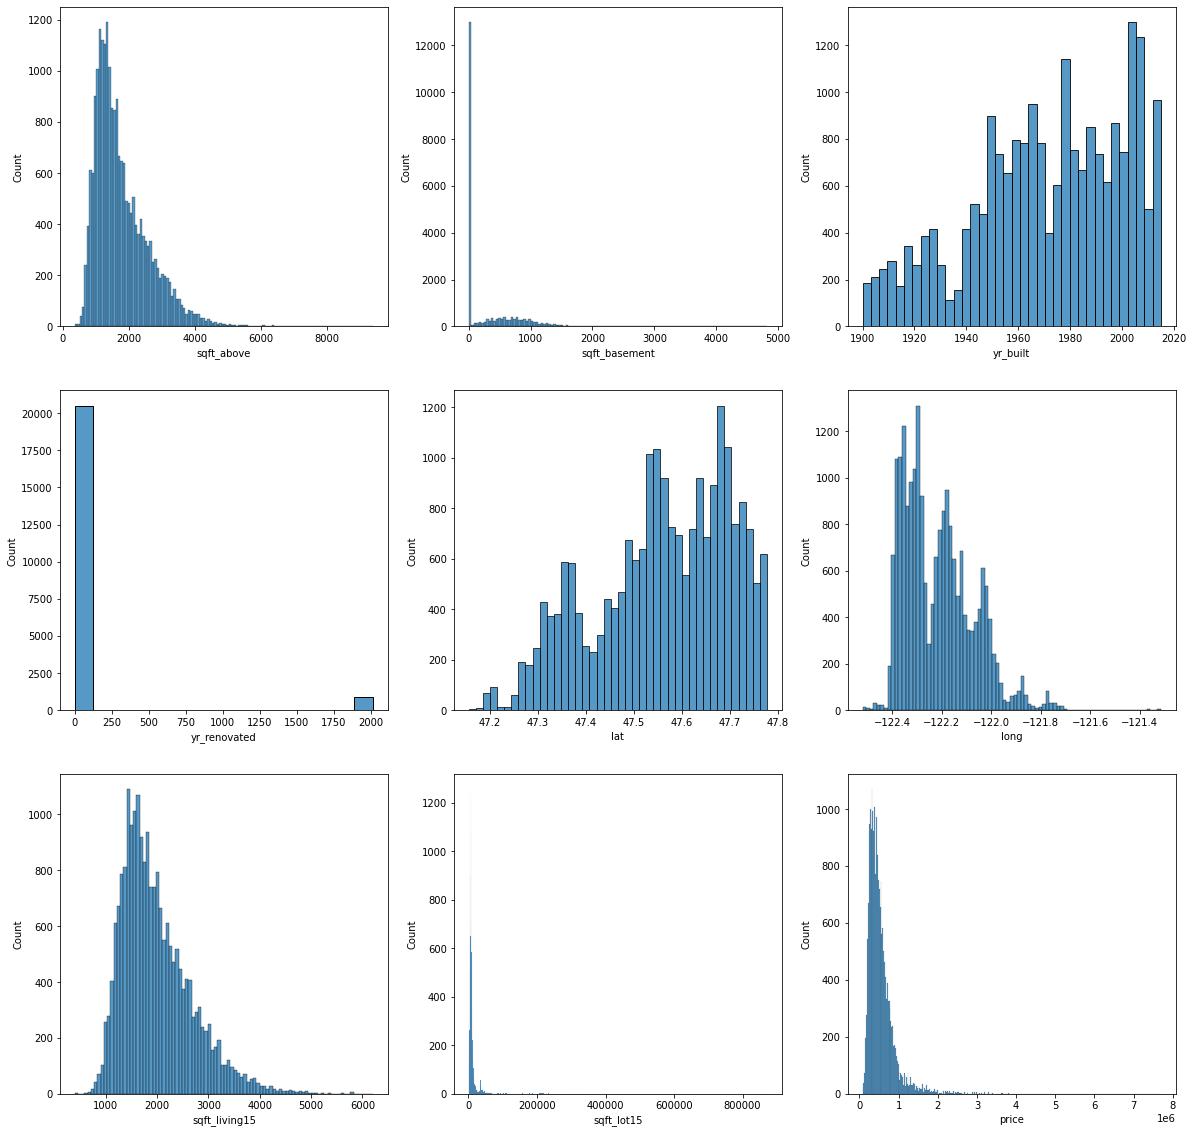

In [37]:
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numerical[column]);

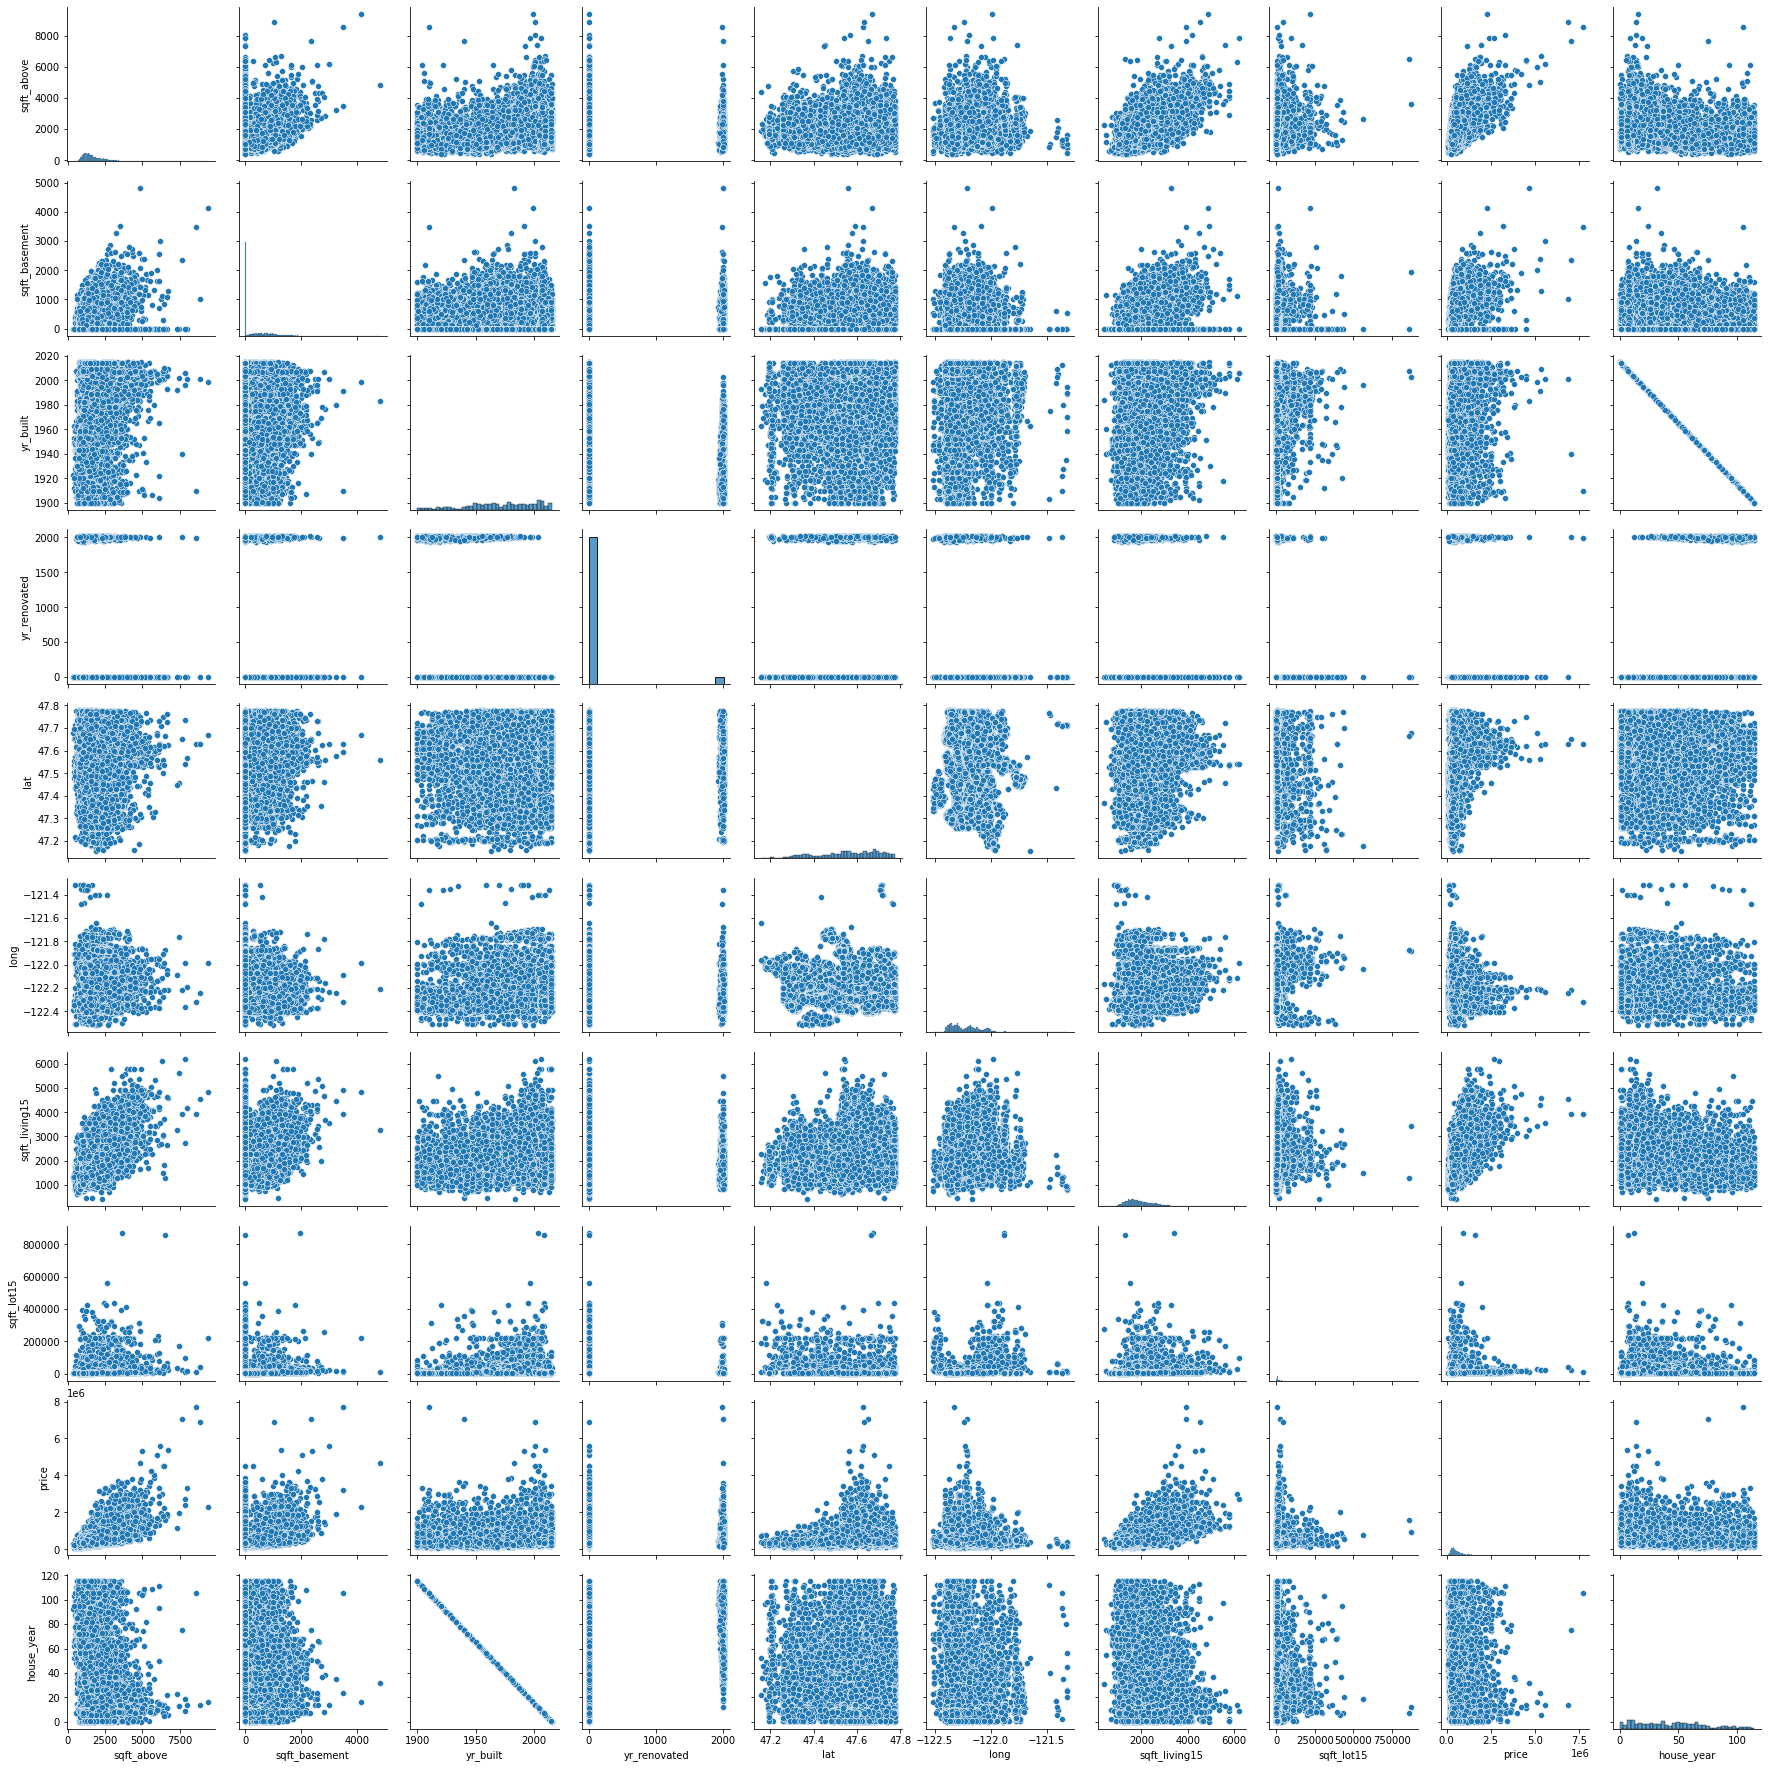

In [39]:
sns.pairplot(numerical)

#### Check the categorical variables visually

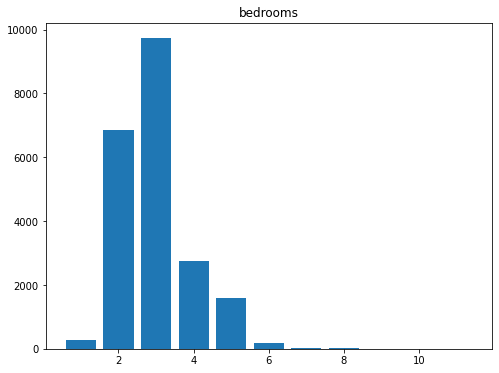

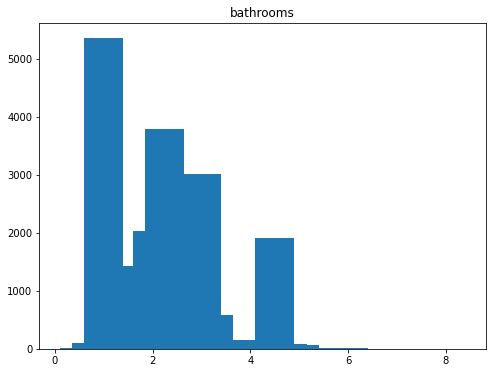

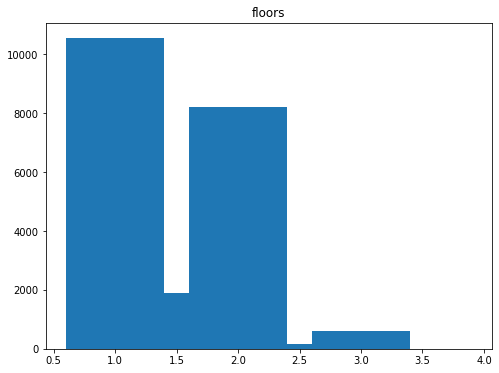

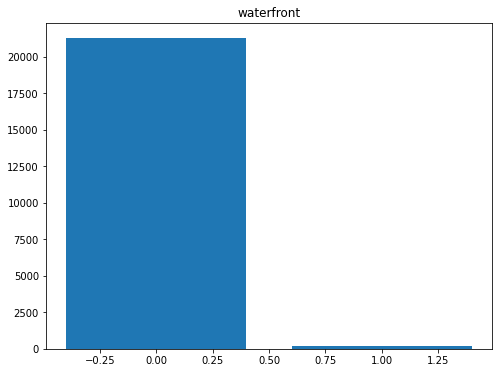

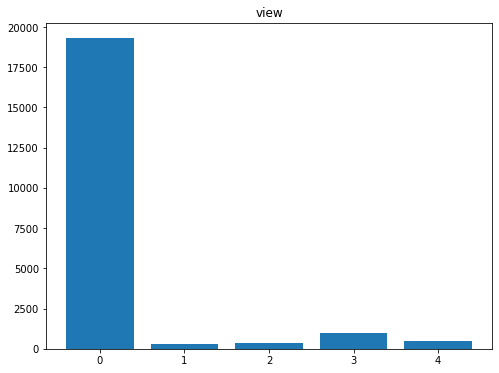

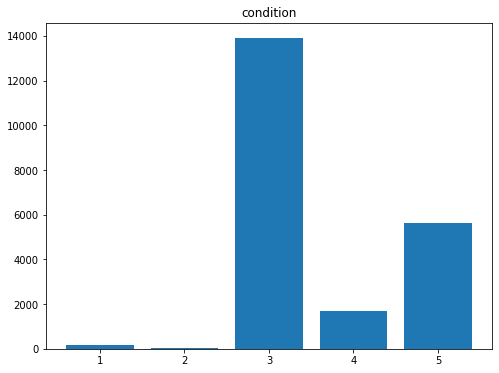

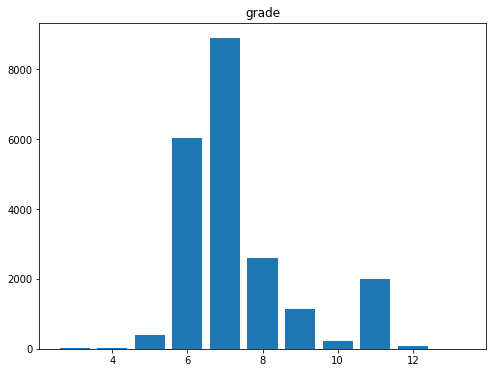

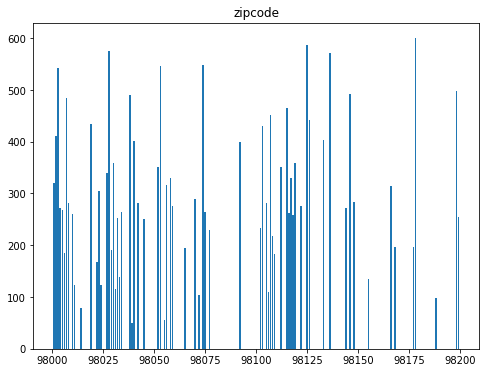

In [40]:
for i in categorical:
    plt.figure(figsize=(8,6))
    plt.bar(df[i].unique(), df[i].value_counts())
    plt.title(i)
    plt.show();

#### Check for multicolinearity

In [41]:
corr_matrix = df.corr()

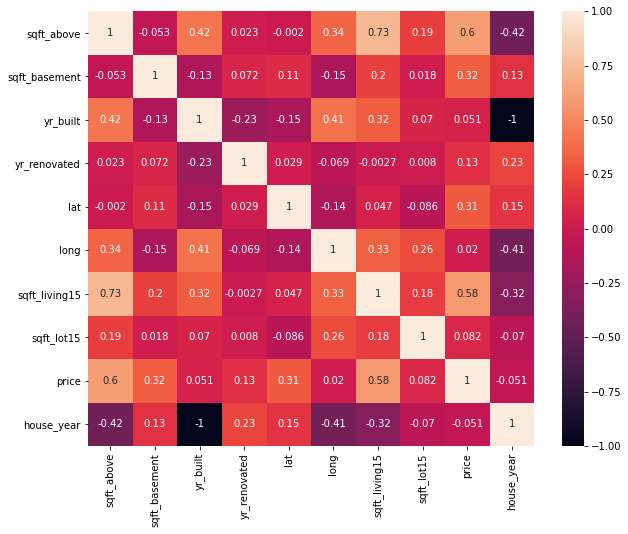

In [81]:
# check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

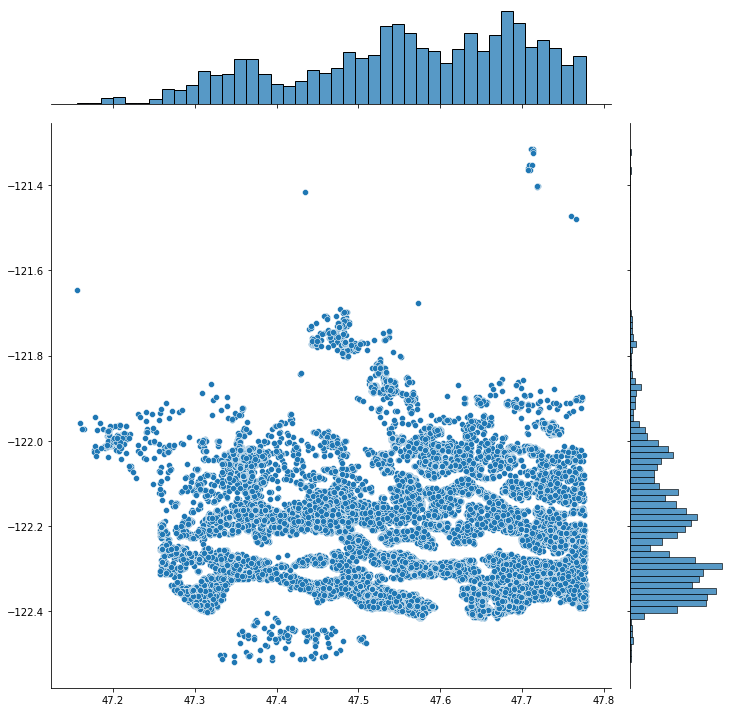

In [43]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df.lat.values, y = df.long.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine;

#### Machine Learning Model : Linear Regression

Let's train the model now, before applying any pre-processing method, this will be the worst scenario.

In [144]:
#import linear-model from scikit-learn and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [145]:
#create a Linear Regression object using the constructor:
lm = LinearRegression()

In this case study, we want to build a ML model to predict the prices of properties based on some different features, so our target variable is the `price` column. The features are the rest of columns of our df, as we have already dropped the irrelevant columns.

In [146]:
#define the predictor and the target variable 
X = df.drop(columns=['price'])
Y = df['price']

In [147]:
#check the shapes of both X, Y (because should have both the same number of rows)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (21420, 21)
Y shape: (21420,)


Split into train - test

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=80)

In [150]:
#train the model
model = lm.fit(X_train,Y_train)

In [151]:
#Fit over our train data and predict against X test features
Y_pred= lm.predict(X_test)

Evaluate our model accuracy over y_test- with metrics such as : 
- R2 
- MSE: Mean Squared Error
- RMSE : Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
- MAE

In [143]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))

R2:  0.7098683203648071
MSE: 37467404065.039474
RMSE:  193564.98667124557


Our accuracy score R2, is relatively close to 1, so the model performs 'well', but can be improved.

#### Pre-processing the data

In order to improve our model and get more accurate results, we will apply some different pre-processing methods.

#### Standardization

In [153]:
from sklearn.preprocessing import StandardScaler

#### Normalization

In [152]:
#Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

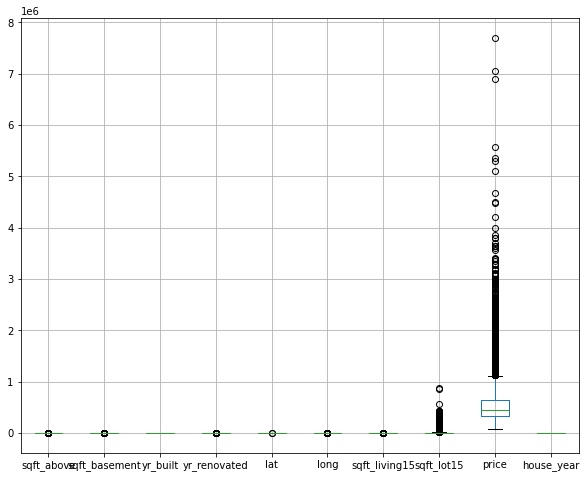

In [44]:
n = df.boxplot(figsize= (10,8))

<AxesSubplot:xlabel='sqft_above'>

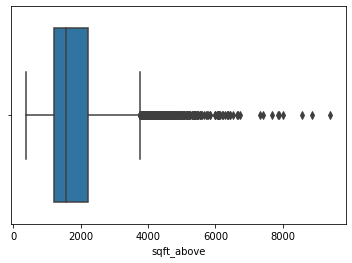

In [45]:
sns.boxplot(x=df['sqft_above'])

<AxesSubplot:xlabel='sqft_basement'>

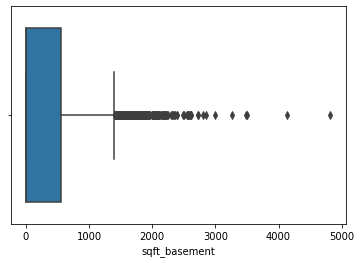

In [46]:
sns.boxplot(x=df['sqft_basement'])

<AxesSubplot:xlabel='yr_built'>

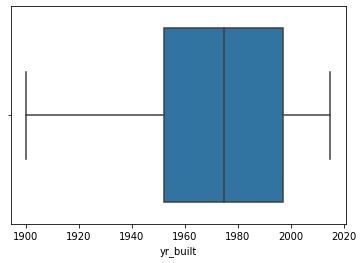

In [47]:
sns.boxplot(x=df['yr_built'])

<AxesSubplot:xlabel='yr_renovated'>

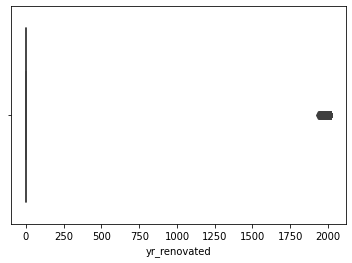

In [48]:
sns.boxplot(x=df['yr_renovated'])

<AxesSubplot:xlabel='lat'>

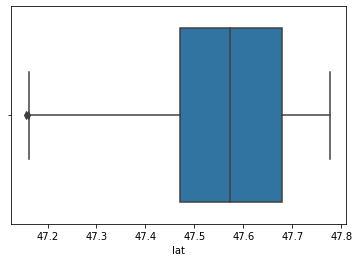

In [49]:
sns.boxplot(x=df['lat'])

<AxesSubplot:xlabel='sqft_living15'>

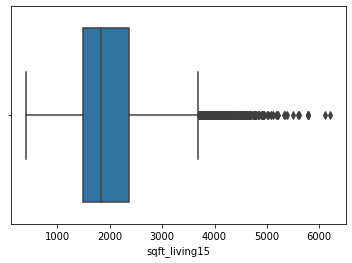

In [51]:
sns.boxplot(x=df['sqft_living15'])

<AxesSubplot:xlabel='sqft_lot15'>

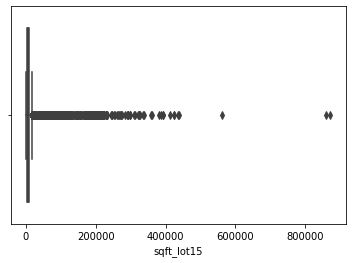

In [52]:
sns.boxplot(x=df['sqft_lot15'])

<AxesSubplot:xlabel='long'>

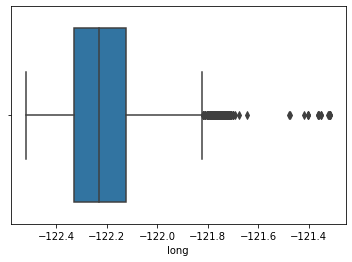

In [78]:
sns.boxplot(x=df['long'])

##### Dealing with outliers

In [53]:
#Let's do a function to apply the IQR method to deal with outliers
def remove_outliers(df,column):
    iqr = np.percentile(df[column],75) - np.percentile(df[column],25)
    upper_limit = np.percentile(df[column],75) + 1.5*iqr
    lower_limit = np.percentile(df[column],25) - 1.5*iqr
    return df[(df[column]>lower_limit) & (df[column]<upper_limit)]

<AxesSubplot:xlabel='sqft_above'>

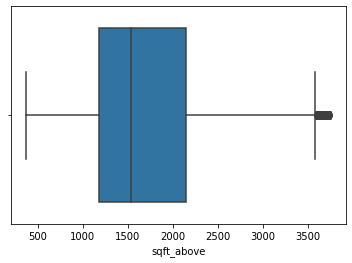

In [58]:
#Outliers sqft above
df_clean = remove_outliers(df,'sqft_above')
sns.boxplot(x=df_clean['sqft_above'])

<AxesSubplot:xlabel='sqft_basement'>

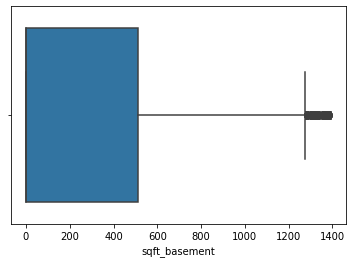

In [59]:
#Outliers sqft basement
df_clean = remove_outliers(df,'sqft_basement')
sns.boxplot(x=df_clean['sqft_basement'])

<AxesSubplot:xlabel='sqft_living15'>

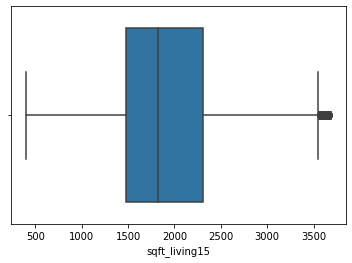

In [60]:
#Outliers sqft living
df_clean = remove_outliers(df,'sqft_living15')
sns.boxplot(x=df_clean['sqft_living15'])

<Figure size 720x720 with 0 Axes>

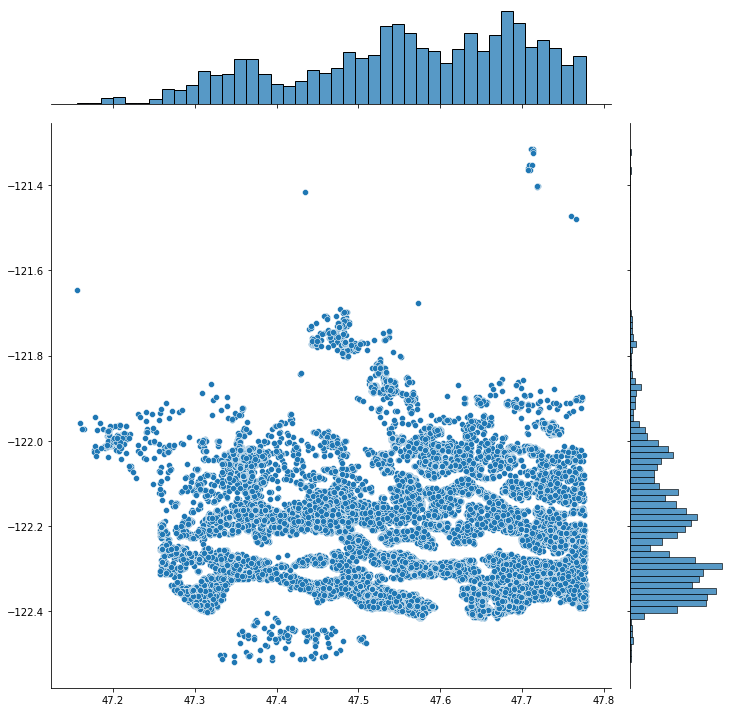

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [61]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df.lat.values, y = df.long.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine

##### Encoding Categorical Data

##### Concat numerical and categorical DataFrames

#### Splitting into train set and test set

In [ ]:
# first, split X-y

In [ ]:
# checking shape

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

#### Modelling

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as LinReg

# create an (untrained) model "instance"
linreg=LinReg()    

# train the model
linreg.fit(X_train, y_train)

# predict target data from test features , that the model has never seen
y_pred_linreg=linreg.predict(X_test)

#### Model Validation

- R2
- MSE
- RMSE
- ... 


#### KNN Model